<a href="https://colab.research.google.com/github/ChengYao0209/ALdea_milk/blob/main/%E7%89%9B%E7%89%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!unzip -uq /content/drive/MyDrive/DataScience/台灣牧場乳量預測/data.zip -d /content/

In [5]:
birth=pd.read_csv("birth.csv",sep=",")
breed=pd.read_csv("breed.csv",sep=",")
report=pd.read_csv("report.csv",sep=",")
spec=pd.read_csv("spec.csv",sep=",")
sub=pd.read_csv("submission.csv",sep=",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print("The shape of birth : ",birth.shape)
print("The shape of breed : ",breed.shape)
print("The shape of report : ",report.shape)
print("The shape of spec : ",spec.shape)

The shape of birth :  (3761, 13)
The shape of breed :  (21050, 8)
The shape of report :  (37517, 21)
The shape of spec :  (4362, 7)


In [7]:
report.head(10)

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,...,2013/1/1 00:00,2013/3/20 00:00,26,2013/3/21 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,...,2013/1/1 00:00,2013/4/18 00:00,27,2013/4/19 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,...,2013/1/1 00:00,2013/5/21 00:00,28,2013/5/22 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,...,2013/1/1 00:00,2013/6/25 00:00,29,2013/6/26 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,...,2013/1/1 00:00,2013/7/30 00:00,30,2013/7/31 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
5,6,2013,8,A,52612,507H7173,96040545,2011/1/1 00:00,1,239.0,...,2013/1/1 00:00,2013/8/28 00:00,31,2013/8/29 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
6,7,2013,10,A,52612,507H7173,96040545,2011/1/1 00:00,1,281.0,...,2013/1/1 00:00,2013/10/9 00:00,33,2013/10/11 00:00,2015/5/5 00:00,507H11621,3,NaN,2013/3/5 00:00,501H8784
7,8,2013,11,A,52612,507H7173,96040545,2011/1/1 00:00,1,311.0,...,2013/1/1 00:00,2013/11/8 00:00,34,2013/11/12 00:00,2015/5/5 00:00,507H11621,3,NaN,2013/3/5 00:00,501H8784
8,9,2013,12,A,52612,507H7173,96040545,2011/1/1 00:00,1,337.0,...,2013/1/1 00:00,2013/12/4 00:00,35,2013/12/5 00:00,2015/5/5 00:00,507H11621,3,NaN,2013/3/5 00:00,501H8784
9,10,2014,1,A,52612,507H7173,96040545,2011/1/1 00:00,1,370.0,...,2013/1/1 00:00,2014/1/6 00:00,36,2014/1/8 00:00,2015/5/5 00:00,507H11621,4,NaN,2013/3/5 00:00,501H8784


In [8]:
sub_data = pd.DataFrame(columns=report.columns)
idx = 0
for i in report['1']:
  for j in sub['ID']:
    if i == j:
      for c in sub_data.columns:
        sub_data.loc[idx, str(c)] = report[str(c)][i-1]
      idx = idx + 1
sub_data.head(10)

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,480,2019,1,A,52631,501H9952,97040152,2011/3/17 00:00,4,435.0,...,2017/11/1 00:00,2019/1/10 00:00,94,2019/1/15 00:00,2019/2/3 00:00,551HO00657,6,2016/8/4 00:00,2018/1/6 00:00,614HO07276
1,742,2019,2,A,52640,501H9952,96040567,2011/4/1 00:00,4,13.0,...,2019/1/29 00:00,2019/2/11 00:00,94,2019/2/12 00:00,2019/2/28 00:00,551HO00695,0,2017/6/17 00:00,2019/2/28 00:00,551HO00695
2,743,2019,3,A,52640,501H9952,96040567,2011/4/1 00:00,4,35.0,...,2019/1/29 00:00,2019/3/5 00:00,95,2019/3/6 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
3,744,2019,4,A,52640,501H9952,96040567,2011/4/1 00:00,4,70.0,...,2019/1/29 00:00,2019/4/9 00:00,96,2019/4/11 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
4,745,2019,5,A,52640,501H9952,96040567,2011/4/1 00:00,4,98.0,...,2019/1/29 00:00,2019/5/7 00:00,97,2019/5/9 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
5,793,2019,2,A,52641,614H5010,97040119,2011/4/2 00:00,6,279.0,...,2018/5/8 00:00,2019/2/11 00:00,94,2019/2/12 00:00,2018/7/29 00:00,507HO12236,1,2017/7/4 00:00,2018/7/29 00:00,507HO12236
6,794,2019,1,A,52641,614H5010,97040119,2011/4/2 00:00,6,247.0,...,2018/5/8 00:00,2019/1/10 00:00,93,2019/1/15 00:00,2018/7/29 00:00,507HO12236,1,2017/7/4 00:00,2018/7/29 00:00,507HO12236
7,800,2019,5,A,52641,614H5010,97040119,2011/4/2 00:00,7,12.0,...,2019/4/25 00:00,2019/5/7 00:00,97,2019/5/9 00:00,NaN,NaN,0,2018/5/8 00:00,NaN,NaN
8,801,2019,6,A,52641,614H5010,97040119,2011/4/2 00:00,7,39.0,...,2019/4/25 00:00,2019/6/3 00:00,98,2019/6/5 00:00,NaN,NaN,0,2018/5/8 00:00,NaN,NaN
9,802,2019,7,A,52641,614H5010,97040119,2011/4/2 00:00,7,67.0,...,2019/4/25 00:00,2019/7/1 00:00,99,2019/7/2 00:00,NaN,NaN,0,2018/5/8 00:00,NaN,NaN


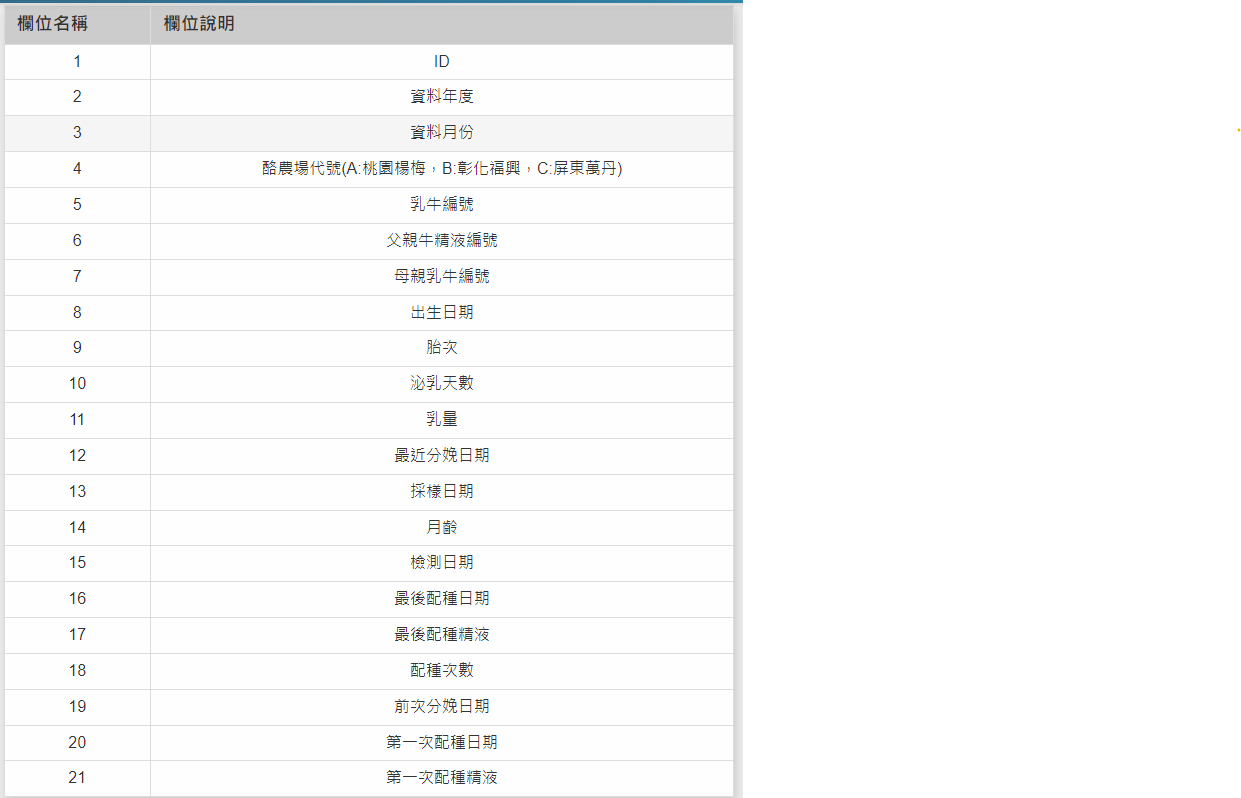


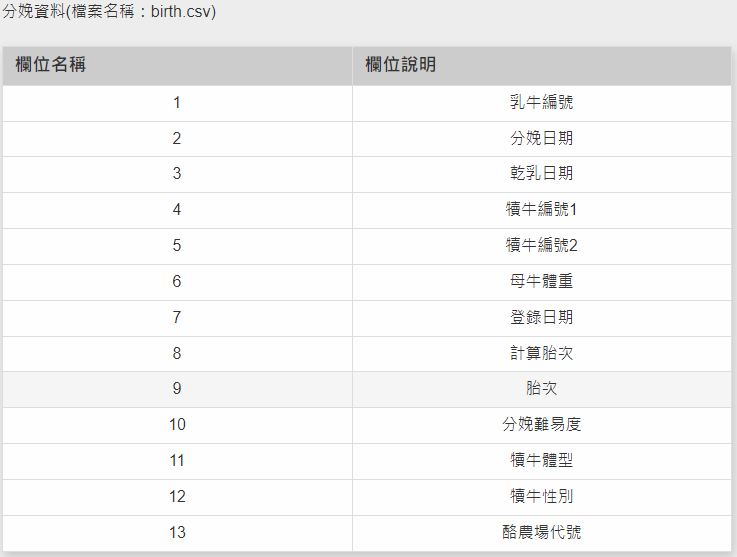

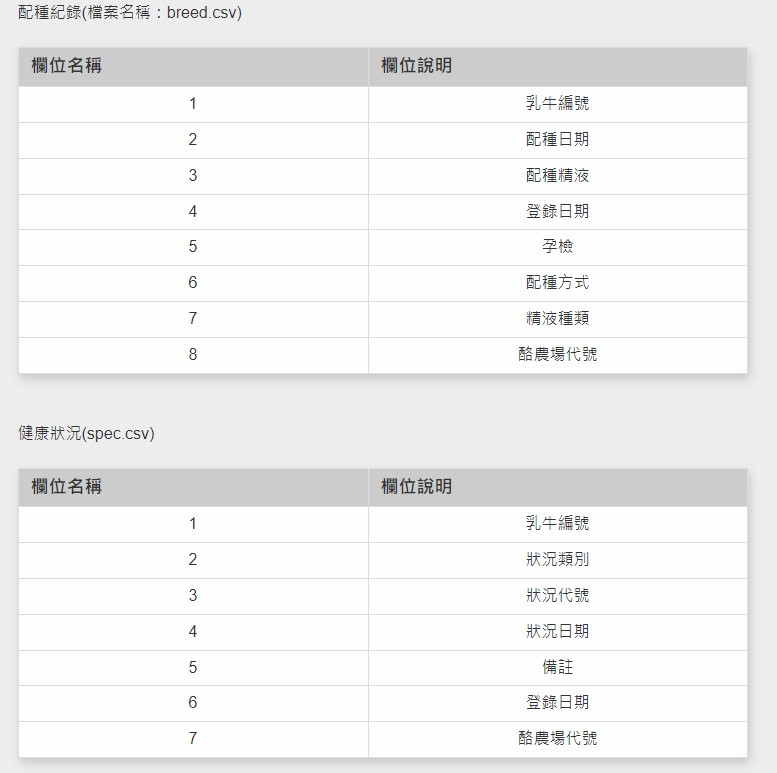

表跟feature實在有點多，從官網上面提供的資料我想先找一些我覺得可以用到的feature
現階段我想先找的是

1.資料年度/月份 (我記得牛乳分泌在夏天冬天會不一樣，會受到當時氣溫干擾)

2.牛牛的父母 (基因層面)

3.地點 (不同農場的飼養方法我想可能不一樣)

4.分娩相關資訊

從column 來看的話是2,3,4,5,6,7,9,10,11,14,18,21


生成第一版的訓練用資料和submit資料~~

In [9]:
train_data=pd.DataFrame(data=report,columns=["1","2","3","4","5","6","7","9","10","11","12","14","18","19","21",'season','year','Sick','weight',"days","borns"])
sub_data=pd.DataFrame(data=sub_data,columns=["1","2","3","4","5","6","7","9","10","12","14","18","19","21",'season','year','Sick','weight',"days","borns"])
train_data=train_data.rename(columns={
    "1":"ID",
    "2":"資料年度",
    "3":"資料月份",
    "4":"酪農場代號",
    "5":"乳牛編號",
    "6":"父親牛精液編號",
    "7":"母親乳牛編號",
    "9":"胎次",
    "10":"泌乳天數",
    "11":"乳量",
    "12":"最近分娩日期",
    "14":"月齡",
    "18":"配種次數",
    "19":"前次分娩日期",
    "21":"第一次配種精液",
})
submit_data=sub_data.rename(columns={
    "1":"ID",
    "2":"資料年度",
    "3":"資料月份",
    "4":"酪農場代號",
    "5":"乳牛編號",
    "6":"父親牛精液編號",
    "7":"母親乳牛編號",
    "9":"胎次",
    "10":"泌乳天數",
    "12":"最近分娩日期",
    "14":"月齡",
    "18":"配種次數",
    "19":"前次分娩日期",
    "21":"第一次配種精液",
})


train_data.head(10)



,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,泌乳天數,乳量,...,月齡,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns
0,1,2013,3,A,52612,507H7173,96040545,1,78.0,29.4,...,26,1,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2013,4,A,52612,507H7173,96040545,1,107.0,27.8,...,27,1,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2013,5,A,52612,507H7173,96040545,1,140.0,9.0,...,28,2,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2013,6,A,52612,507H7173,96040545,1,175.0,13.0,...,29,2,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2013,7,A,52612,507H7173,96040545,1,210.0,13.2,...,30,2,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2013,8,A,52612,507H7173,96040545,1,239.0,15.7,...,31,2,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2013,10,A,52612,507H7173,96040545,1,281.0,12.8,...,33,3,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2013,11,A,52612,507H7173,96040545,1,311.0,8.8,...,34,3,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2013,12,A,52612,507H7173,96040545,1,337.0,9.0,...,35,3,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2014,1,A,52612,507H7173,96040545,1,370.0,5.0,...,36,4,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:

submit_data.head(10)

,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,泌乳天數,最近分娩日期,月齡,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns
0,480,2019,1,A,52631,501H9952,97040152,4,435.0,2017/11/1 00:00,94,6,2016/8/4 00:00,614HO07276,NaN,NaN,NaN,NaN,NaN,NaN
1,742,2019,2,A,52640,501H9952,96040567,4,13.0,2019/1/29 00:00,94,0,2017/6/17 00:00,551HO00695,NaN,NaN,NaN,NaN,NaN,NaN
2,743,2019,3,A,52640,501H9952,96040567,4,35.0,2019/1/29 00:00,95,1,2017/6/17 00:00,551HO00695,NaN,NaN,NaN,NaN,NaN,NaN
3,744,2019,4,A,52640,501H9952,96040567,4,70.0,2019/1/29 00:00,96,1,2017/6/17 00:00,551HO00695,NaN,NaN,NaN,NaN,NaN,NaN
4,745,2019,5,A,52640,501H9952,96040567,4,98.0,2019/1/29 00:00,97,1,2017/6/17 00:00,551HO00695,NaN,NaN,NaN,NaN,NaN,NaN
5,793,2019,2,A,52641,614H5010,97040119,6,279.0,2018/5/8 00:00,94,1,2017/7/4 00:00,507HO12236,NaN,NaN,NaN,NaN,NaN,NaN
6,794,2019,1,A,52641,614H5010,97040119,6,247.0,2018/5/8 00:00,93,1,2017/7/4 00:00,507HO12236,NaN,NaN,NaN,NaN,NaN,NaN
7,800,2019,5,A,52641,614H5010,97040119,7,12.0,2019/4/25 00:00,97,0,2018/5/8 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,801,2019,6,A,52641,614H5010,97040119,7,39.0,2019/4/25 00:00,98,0,2018/5/8 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,802,2019,7,A,52641,614H5010,97040119,7,67.0,2019/4/25 00:00,99,0,2018/5/8 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(train_data.shape)
print(sub_data.shape)

(37517, 21)
(4263, 20)


In [12]:
print(train_data.isnull().sum())

ID             0
資料年度           0
資料月份           0
酪農場代號          0
乳牛編號           0
父親牛精液編號      876
母親乳牛編號      3584
胎次             0
泌乳天數           1
乳量          4263
最近分娩日期         1
月齡             0
配種次數           0
前次分娩日期     17420
第一次配種精液     1431
season     37517
year       37517
Sick       37517
weight     37517
days       37517
borns      37517
dtype: int64


再見了，乳量那邊如果是沒有資料或是為0的就等於沒有用

In [13]:
train_data = train_data.dropna(subset=["乳量"])
train_data.reset_index(inplace=True)

In [14]:
for i in range(len(train_data["乳量"])):
  if train_data["乳量"][i] == 0:
    train_data=train_data.drop([i]) #把乳量為0的那排直接槓掉,axis=0
    
train_data.reset_index(inplace=True)
train_data.isna().sum()

level_0        0
index          0
ID             0
資料年度           0
資料月份           0
酪農場代號          0
乳牛編號           0
父親牛精液編號      628
母親乳牛編號      3245
胎次             0
泌乳天數           1
乳量             0
最近分娩日期         1
月齡             0
配種次數           0
前次分娩日期     15632
第一次配種精液     1018
season     33186
year       33186
Sick       33186
weight     33186
days       33186
borns      33186
dtype: int64

In [15]:
train_data["year"]=train_data["資料年度"]
submit_data["year"]=submit_data["資料年度"]

In [16]:
train_data.head(10)

,level_0,index,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,...,月齡,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns
0,0,0,1,2013,3,A,52612,507H7173,96040545,1,...,26,1,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN
1,1,1,2,2013,4,A,52612,507H7173,96040545,1,...,27,1,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN
2,2,2,3,2013,5,A,52612,507H7173,96040545,1,...,28,2,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN
3,3,3,4,2013,6,A,52612,507H7173,96040545,1,...,29,2,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN
4,4,4,5,2013,7,A,52612,507H7173,96040545,1,...,30,2,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN
5,5,5,6,2013,8,A,52612,507H7173,96040545,1,...,31,2,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN
6,6,6,7,2013,10,A,52612,507H7173,96040545,1,...,33,3,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN
7,7,7,8,2013,11,A,52612,507H7173,96040545,1,...,34,3,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN
8,8,8,9,2013,12,A,52612,507H7173,96040545,1,...,35,3,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN
9,9,9,10,2014,1,A,52612,507H7173,96040545,1,...,36,4,NaN,501H8784,NaN,2014,NaN,NaN,NaN,NaN


處理缺失值之前，我想多加一點資訊
我想增加像是當時是否有疾病或是其他的(要從其他地方找)

In [17]:
#從SPEC 表裡面找一下，牛牛是否有生病

from datetime import datetime 
#1999/8/24  12:00:00 AM 日期是長這個,等等拿來拆開
#先找說這隻牛有沒有生病，如果spec裡面有紀錄的話在檢查時間有沒有對上。如果有的話就給1，沒有給0
for i in range(len(spec)):
  day=datetime.strptime(spec["4"][i],"%Y/%m/%d %H:%M")
  if len(train_data.index[train_data["乳牛編號"] == spec["1"][i]])>0:
    for j in train_data.index[train_data["乳牛編號"] == spec["1"][i]]:
      if train_data["year"][j] == day.year and train_data['資料月份'][j] == day.month and train_data["酪農場代號"][j]==spec["7"][i]:
        train_data["Sick"][j] = 1
  if len(submit_data.index[submit_data["乳牛編號"] == spec["1"][i]])>0:
    for j in submit_data.index[submit_data['乳牛編號'] == spec["1"][i]]:
      if submit_data["year"][j] == day.year and submit_data["資料月份"][j] == day.month and submit_data["酪農場代號"][j]==spec["7"][i]:
        submit_data["Sick"][j] = 1

train_data["Sick"].fillna(0,inplace=True) #當初沒有配對到的應該就是產乳時是健康的
submit_data["Sick"].fillna(0,inplace=True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


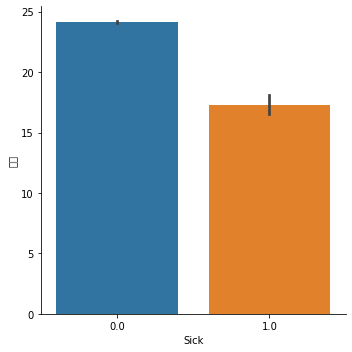

In [18]:
#看看健康對於產乳量是否有差距
sns.catplot(
    data=train_data, kind="bar",
    x="Sick", y="乳量"
)

In [19]:
#考慮每隻牛牛重量不同，有人身強體壯可以產很多乳，有些瘦弱可能沒那麼多能量

avgw = birth["6"].median()
birth["6"] = birth["6"].fillna(avgw)
for i in range(len(birth)):
  if len(train_data.index[train_data["乳牛編號"] == birth["1"][i]]) > 0:
    for j in train_data.index[train_data["乳牛編號"] == birth["1"][i]]:
      train_data.loc[j,"weight"] = round(birth["6"][i],2)

  if len(submit_data.index[submit_data["乳牛編號"] == birth["1"][i]]) > 0:
    for j in submit_data.index[submit_data["乳牛編號"] == birth["1"][i]]:
      submit_data.loc[j,"weight"] = round(birth["6"][i],2)
avgw = birth["6"].median()
train_data["weight"].fillna(avgw,inplace=True)
submit_data["weight"].fillna(avgw,inplace=True)


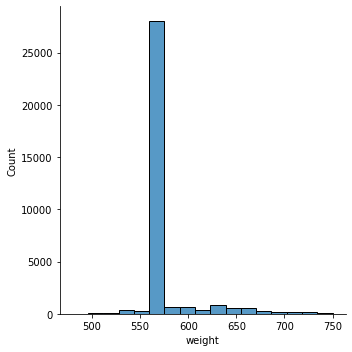

In [20]:
sns.displot(
    train_data, x="weight"
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


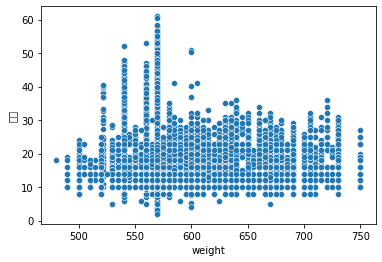

In [21]:
sns.scatterplot(x="weight", y="乳量",data=train_data)

In [22]:
train_data.isna().sum()

level_0        0
index          0
ID             0
資料年度           0
資料月份           0
酪農場代號          0
乳牛編號           0
父親牛精液編號      628
母親乳牛編號      3245
胎次             0
泌乳天數           1
乳量             0
最近分娩日期         1
月齡             0
配種次數           0
前次分娩日期     15632
第一次配種精液     1018
season     33186
year           0
Sick           0
weight         0
days       33186
borns      33186
dtype: int64

In [23]:
#處理一下月份~~變成春夏秋冬之後在OHE比較好。單純用月份的話是數字可能會有上下關係

for i in range(len(train_data)):
  if train_data["資料月份"][i] >=3 and train_data["資料月份"][i] <= 5:
    train_data["season"][i] = "Spring"
  elif train_data["資料月份"][i] >=6 and train_data["資料月份"][i] <= 8:
    train_data["season"][i] = "Summer"
  elif train_data["資料月份"][i] >=9 and train_data["資料月份"][i] <= 11:
    train_data["season"][i] = "Autumn"
  else :
    train_data["season"][i] = "Winter"
for i in range(len(submit_data)):
  if submit_data["資料月份"][i] >=3 and submit_data["資料月份"][i] <= 5:
    submit_data["season"][i] = "Spring"
  elif submit_data["資料月份"][i] >=6 and submit_data["資料月份"][i] <= 8:
    submit_data["season"][i] = "Summer"
  elif submit_data["資料月份"][i] >=9 and submit_data["資料月份"][i] <= 11:
    submit_data["season"][i] = "Autumn"
  else :
    submit_data["season"][i] = "Winter"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
train_data.head(10)

,level_0,index,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,...,月齡,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns
0,0,0,1,2013,3,A,52612,507H7173,96040545,1,...,26,1,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN
1,1,1,2,2013,4,A,52612,507H7173,96040545,1,...,27,1,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN
2,2,2,3,2013,5,A,52612,507H7173,96040545,1,...,28,2,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN
3,3,3,4,2013,6,A,52612,507H7173,96040545,1,...,29,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN
4,4,4,5,2013,7,A,52612,507H7173,96040545,1,...,30,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN
5,5,5,6,2013,8,A,52612,507H7173,96040545,1,...,31,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN
6,6,6,7,2013,10,A,52612,507H7173,96040545,1,...,33,3,NaN,501H8784,Autumn,2013,0.0,570.0,NaN,NaN
7,7,7,8,2013,11,A,52612,507H7173,96040545,1,...,34,3,NaN,501H8784,Autumn,2013,0.0,570.0,NaN,NaN
8,8,8,9,2013,12,A,52612,507H7173,96040545,1,...,35,3,NaN,501H8784,Winter,2013,0.0,570.0,NaN,NaN
9,9,9,10,2014,1,A,52612,507H7173,96040545,1,...,36,4,NaN,501H8784,Winter,2014,0.0,570.0,NaN,NaN


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37226 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36786 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37226 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36786 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22580 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 34399 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0,

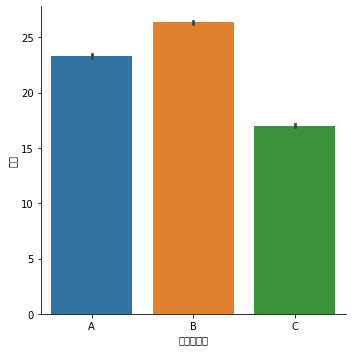

In [25]:
sns.catplot(
    data=train_data, kind="bar",
    x="酪農場代號", y="乳量"
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


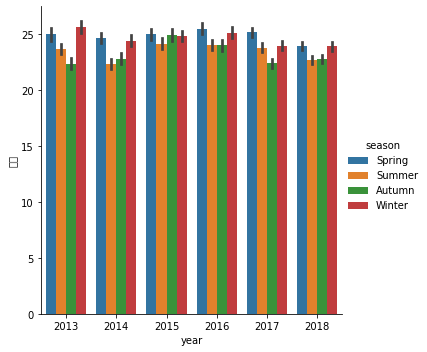

In [26]:
sns.catplot(
    data=train_data, kind="bar",
    x="year", y="乳量", hue="season"
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


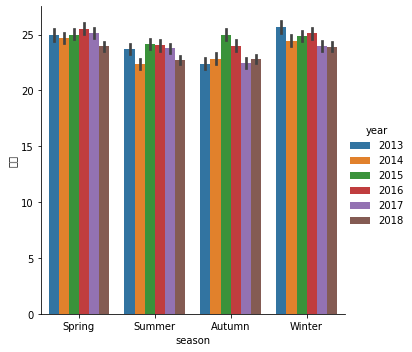

In [27]:
sns.catplot(
    data=train_data, kind="bar",
    x="season", y="乳量", hue="year"
)

In [28]:
submit_data.head(10)

,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,泌乳天數,最近分娩日期,月齡,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns
0,480,2019,1,A,52631,501H9952,97040152,4,435.0,2017/11/1 00:00,94,6,2016/8/4 00:00,614HO07276,Winter,2019,0.0,570.0,NaN,NaN
1,742,2019,2,A,52640,501H9952,96040567,4,13.0,2019/1/29 00:00,94,0,2017/6/17 00:00,551HO00695,Winter,2019,0.0,570.0,NaN,NaN
2,743,2019,3,A,52640,501H9952,96040567,4,35.0,2019/1/29 00:00,95,1,2017/6/17 00:00,551HO00695,Spring,2019,0.0,570.0,NaN,NaN
3,744,2019,4,A,52640,501H9952,96040567,4,70.0,2019/1/29 00:00,96,1,2017/6/17 00:00,551HO00695,Spring,2019,0.0,570.0,NaN,NaN
4,745,2019,5,A,52640,501H9952,96040567,4,98.0,2019/1/29 00:00,97,1,2017/6/17 00:00,551HO00695,Spring,2019,1.0,570.0,NaN,NaN
5,793,2019,2,A,52641,614H5010,97040119,6,279.0,2018/5/8 00:00,94,1,2017/7/4 00:00,507HO12236,Winter,2019,0.0,570.0,NaN,NaN
6,794,2019,1,A,52641,614H5010,97040119,6,247.0,2018/5/8 00:00,93,1,2017/7/4 00:00,507HO12236,Winter,2019,0.0,570.0,NaN,NaN
7,800,2019,5,A,52641,614H5010,97040119,7,12.0,2019/4/25 00:00,97,0,2018/5/8 00:00,NaN,Spring,2019,0.0,570.0,NaN,NaN
8,801,2019,6,A,52641,614H5010,97040119,7,39.0,2019/4/25 00:00,98,0,2018/5/8 00:00,NaN,Summer,2019,0.0,570.0,NaN,NaN
9,802,2019,7,A,52641,614H5010,97040119,7,67.0,2019/4/25 00:00,99,0,2018/5/8 00:00,NaN,Summer,2019,0.0,570.0,NaN,NaN


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0, flags=flags)


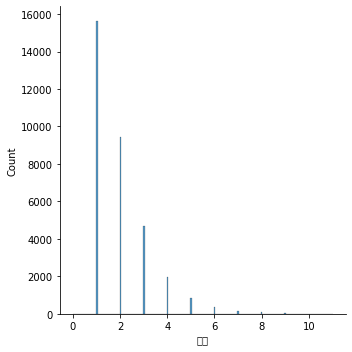

In [29]:
sns.displot(
    train_data, x="胎次"
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text

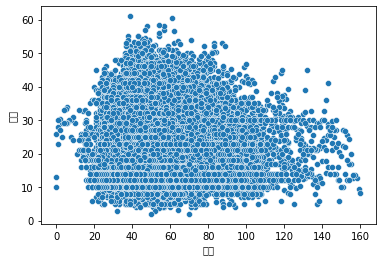

In [104]:
sns.scatterplot(x="月齡", y="乳量",data=train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0, flags=flags)


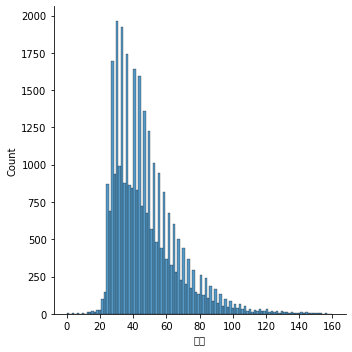

In [30]:
sns.displot(
    train_data, x="月齡"
)

In [102]:
B=train_data["月齡"]**(1/5)
#B=np.log1p(train_data["泌乳天數"])
skewness=round(B.skew(),2)
kurtosis=round(B.kurt(),2)
print(f"偏度(Skewness):{skewness} , 峰度(Kurtosis):{kurtosis}")

偏度(Skewness):0.3 , 峰度(Kurtosis):3.17


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0, flags=flags)


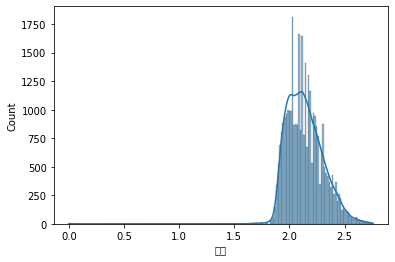

In [103]:
sns.histplot(B,kde=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27852 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0, flags=flags)


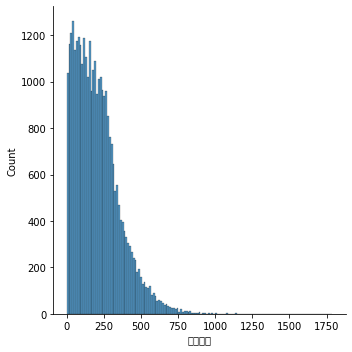

In [33]:
sns.displot(
    train_data, x="泌乳天數"
)

In [34]:

skewness=round(train_data["泌乳天數"].skew(),2)
kurtosis=round(train_data["泌乳天數"].kurt(),2)
print(f"偏度(Skewness):{skewness} , 峰度(Kurtosis):{kurtosis}")


偏度(Skewness):1.12 , 峰度(Kurtosis):1.97


#Pre-processing log1p轉化

In [35]:
# A=np.log1p(train_data["泌乳天數"])
# skewness=round(A.skew(),2)
# kurtosis=round(A.kurt(),2)
# print(f"偏度(Skewness):{skewness} , 峰度(Kurtosis):{kurtosis}")

In [36]:
# sns.histplot(A,kde=True)

#Pre-processing 平方根轉化

In [37]:
B=train_data["泌乳天數"]**(1/3)
skewness=round(B.skew(),2)
kurtosis=round(B.kurt(),2)
print(f"偏度(Skewness):{skewness} , 峰度(Kurtosis):{kurtosis}")

偏度(Skewness):-0.26 , 峰度(Kurtosis):-0.32


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27852 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_te

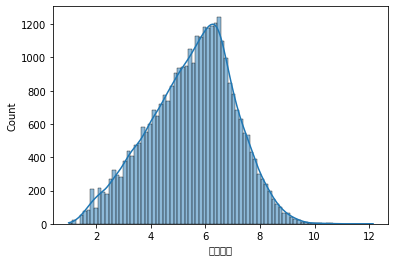

In [38]:
sns.histplot(B,kde=True)

#Pre-processing conbox轉化

In [39]:
# from scipy.stats import boxcox
# C, lam = boxcox(train_data["泌乳天數"])
# C = pd.DataFrame(C, columns=['泌乳天數'])['泌乳天數']
# # skewness 與 kurtosis
# skewness = round(C.skew(), 2)
# kurtosis = round(C.kurt(), 2)
# print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")


In [40]:
# 繪製分布圖
# sns.histplot(C, kde=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text

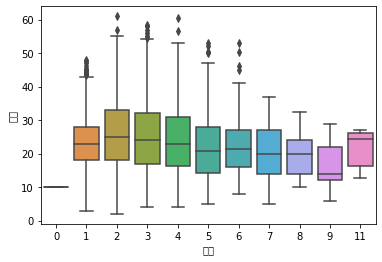

In [41]:
#sns.scatterplot(x="胎次", y="乳量",data=train_data)
sns.boxplot(x="胎次", y="乳量",
            data=train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_te

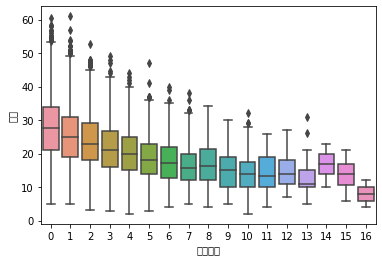

In [42]:
sns.boxplot(x="配種次數", y="乳量",
            data=train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0, flags=flags)


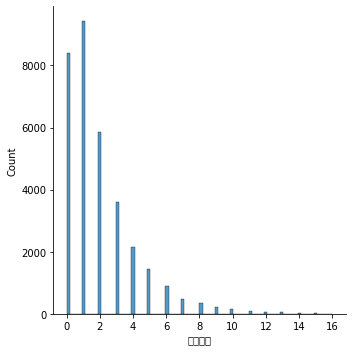

In [43]:
sns.displot(
    train_data, x="配種次數"
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_te

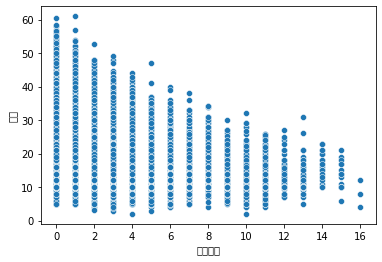

In [44]:
sns.scatterplot(x="配種次數", y="乳量",data=train_data)

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33186 entries, 0 to 33185
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   level_0  33186 non-null  int64  
 1   index    33186 non-null  int64  
 2   ID       33186 non-null  int64  
 3   資料年度     33186 non-null  int64  
 4   資料月份     33186 non-null  int64  
 5   酪農場代號    33186 non-null  object 
 6   乳牛編號     33186 non-null  int64  
 7   父親牛精液編號  32558 non-null  object 
 8   母親乳牛編號   29941 non-null  object 
 9   胎次       33186 non-null  int64  
 10  泌乳天數     33185 non-null  float64
 11  乳量       33186 non-null  float64
 12  最近分娩日期   33185 non-null  object 
 13  月齡       33186 non-null  int64  
 14  配種次數     33186 non-null  int64  
 15  前次分娩日期   17554 non-null  object 
 16  第一次配種精液  32168 non-null  object 
 17  season   33186 non-null  object 
 18  year     33186 non-null  int64  
 19  Sick     33186 non-null  float64
 20  weight   33186 non-null  float64
 21  days     0 n

In [46]:
train_data.isna().sum()

level_0        0
index          0
ID             0
資料年度           0
資料月份           0
酪農場代號          0
乳牛編號           0
父親牛精液編號      628
母親乳牛編號      3245
胎次             0
泌乳天數           1
乳量             0
最近分娩日期         1
月齡             0
配種次數           0
前次分娩日期     15632
第一次配種精液     1018
season         0
year           0
Sick           0
weight         0
days       33186
borns      33186
dtype: int64

In [47]:
train_data.dropna(subset=["泌乳天數"],inplace=True)

In [48]:
submit_data.dropna(subset=["泌乳天數"],inplace=True)

In [49]:

# for i in range(len(train_data["泌乳天數"])):
#   if train_data['泌乳天數'][i] <=100:
#     train_data['days'][i] = 0
#   elif train_data['泌乳天數'][i]>=101 and train_data['泌乳天數'][i] <=200 :
#     train_data['days'][i] = 1
#   elif train_data['泌乳天數'][i] >=201 and train_data['泌乳天數'][i] <=300:
#     train_data['days'][i] = 2
#   else:
#     train_data['days'][i] = 3
#   if int(train_data["胎次"][i]) <=2:
#     train_data["borns"][i] = 0
#   elif int(train_data['胎次'][i]) >=7:
#     train_data['borns'][i] = 2
#   else:
#     train_data['borns'][i] = 1


In [50]:
# for i in range(len(submit_data['泌乳天數'])):
#     if int(submit_data['泌乳天數'][i]) <=100:
#         submit_data['days'][i] = 0
#     elif int(submit_data['泌乳天數'][i]) >=101 and int(submit_data['泌乳天數'][i]) <=200 :
#         submit_data['days'][i] = 1
#     elif int(submit_data['泌乳天數'][i]) >=201 and int(submit_data['泌乳天數'][i]) <=300:
#         submit_data['days'][i] = 2
#     else:
#         submit_data['泌乳天數'][i] = 3
#     if int(submit_data['胎次'][i]) <=2:
#         submit_data['borns'][i] = 0
#     elif int(submit_data['胎次'][i]) >=7:
#         submit_data['borns'][i] = 2
#     else:
#       submit_data['borns'][i] = 1


雖然有點粗糙，不過我想從
1.生的胎數
2.泌乳天數
和乳量也是有關的
看起來胎數和天數越多,乳量越少(可能被榨乾ㄌ)


In [51]:
y = train_data["乳量"]
y

0        29.4
1        27.8
2         9.0
3        13.0
4        13.2
         ... 
33181    20.0
33182    21.0
33183    19.0
33184    12.0
33185    10.0
Name: 乳量, Length: 33185, dtype: float64

In [52]:
# mod=train_data["母親乳牛編號"].mode()
# train_data["母親乳牛編號"].fillna(mod,inplace=True)
# submit_data["母親乳牛編號"].fillna(mod,inplace=True)

In [53]:
# train_data["母親乳牛編號"]=train_data["母親乳牛編號"].astype(str)
# submit_data["母親乳牛編號"]=submit_data["母親乳牛編號"].astype(str)


In [54]:
X_train=train_data.copy()
X_sub=submit_data.copy()

In [55]:
X_train.head(10)

,level_0,index,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,...,月齡,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns
0,0,0,1,2013,3,A,52612,507H7173,96040545,1,...,26,1,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN
1,1,1,2,2013,4,A,52612,507H7173,96040545,1,...,27,1,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN
2,2,2,3,2013,5,A,52612,507H7173,96040545,1,...,28,2,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN
3,3,3,4,2013,6,A,52612,507H7173,96040545,1,...,29,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN
4,4,4,5,2013,7,A,52612,507H7173,96040545,1,...,30,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN
5,5,5,6,2013,8,A,52612,507H7173,96040545,1,...,31,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN
6,6,6,7,2013,10,A,52612,507H7173,96040545,1,...,33,3,NaN,501H8784,Autumn,2013,0.0,570.0,NaN,NaN
7,7,7,8,2013,11,A,52612,507H7173,96040545,1,...,34,3,NaN,501H8784,Autumn,2013,0.0,570.0,NaN,NaN
8,8,8,9,2013,12,A,52612,507H7173,96040545,1,...,35,3,NaN,501H8784,Winter,2013,0.0,570.0,NaN,NaN
9,9,9,10,2014,1,A,52612,507H7173,96040545,1,...,36,4,NaN,501H8784,Winter,2014,0.0,570.0,NaN,NaN


In [91]:
X_sub[3800:4100].head(100)

,酪農場代號,乳牛編號,母親乳牛編號,Sick,胎次,泌乳天數,月齡,配種次數
3800,2,914,180,0,4,4.481405,3.914868,0
3801,2,914,180,0,4,3.957892,3.892996,0
3802,2,914,180,0,4,3.036589,3.870877,0
3803,2,914,180,0,4,4.946087,3.936497,0
3804,2,914,180,0,4,5.301459,3.957892,0
...,...,...,...,...,...,...,...,...
3895,2,1176,365,0,3,1.709976,3.608826,0
3896,2,1177,1260,0,2,6.767899,3.556893,3
3897,2,1177,1260,0,2,7.006796,3.583048,3
3898,2,1177,1260,0,3,2.802039,3.659306,0


In [56]:
all=pd.concat([X_train,X_sub])


In [57]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37448 entries, 0 to 4262
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   level_0  33185 non-null  float64
 1   index    33185 non-null  float64
 2   ID       37448 non-null  object 
 3   資料年度     37448 non-null  object 
 4   資料月份     37448 non-null  object 
 5   酪農場代號    37448 non-null  object 
 6   乳牛編號     37448 non-null  object 
 7   父親牛精液編號  36573 non-null  object 
 8   母親乳牛編號   33874 non-null  object 
 9   胎次       37448 non-null  object 
 10  泌乳天數     37448 non-null  object 
 11  乳量       33185 non-null  float64
 12  最近分娩日期   37448 non-null  object 
 13  月齡       37448 non-null  object 
 14  配種次數     37448 non-null  object 
 15  前次分娩日期   20066 non-null  object 
 16  第一次配種精液  36028 non-null  object 
 17  season   37448 non-null  object 
 18  year     37448 non-null  object 
 19  Sick     37448 non-null  float64
 20  weight   37448 non-null  float64
 21  days     0 no

In [58]:
all.isna().sum()

level_0     4263
index       4263
ID             0
資料年度           0
資料月份           0
酪農場代號          0
乳牛編號           0
父親牛精液編號      875
母親乳牛編號      3574
胎次             0
泌乳天數           0
乳量          4263
最近分娩日期         0
月齡             0
配種次數           0
前次分娩日期     17382
第一次配種精液     1420
season         0
year           0
Sick           0
weight         0
days       37448
borns      37448
dtype: int64

#處理月齡

In [59]:
A=all["月齡"]**(1/3)
all["月齡"]=A
# skewness=round(B.skew(),2)
# kurtosis=round(B.kurt(),2)
# print(f"偏度(Skewness):{skewness} , 峰度(Kurtosis):{kurtosis}")

#處理泌乳天數


In [60]:
B=all["泌乳天數"]**(1/3)
all["泌乳天數"]=B
#skewness=round(B.skew(),2)
#kurtosis=round(B.kurt(),2)
#print(f"偏度(Skewness):{skewness} , 峰度(Kurtosis):{kurtosis}")

#處理配種次數


#處理胎次


In [61]:
all

,level_0,index,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,...,月齡,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns
0,0.0,0.0,1,2013,3,A,52612,507H7173,96040545,1,...,2.962496,1,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN
1,1.0,1.0,2,2013,4,A,52612,507H7173,96040545,1,...,3.0,1,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN
2,2.0,2.0,3,2013,5,A,52612,507H7173,96040545,1,...,3.036589,2,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN
3,3.0,3.0,4,2013,6,A,52612,507H7173,96040545,1,...,3.072317,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN
4,4.0,4.0,5,2013,7,A,52612,507H7173,96040545,1,...,3.107233,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,NaN,NaN,37481,2019,6,C,6187446,001HO11511,4170458.0,1,...,2.884499,0,NaN,001HO12901,Summer,2019,0.0,540.0,NaN,NaN
4259,NaN,NaN,37482,2019,6,C,6187448,001HO11511,3172306.0,1,...,2.884499,0,NaN,NaN,Summer,2019,0.0,490.0,NaN,NaN
4260,NaN,NaN,37483,2019,6,C,6187449,001HO11511,2176835.0,1,...,2.802039,0,NaN,NaN,Summer,2019,0.0,540.0,NaN,NaN
4261,NaN,NaN,37484,2019,7,C,6187449,001HO11511,2176835.0,1,...,2.843867,0,NaN,NaN,Summer,2019,0.0,540.0,NaN,NaN


In [62]:
print(len(all["乳牛編號"].value_counts()))
all["乳牛編號"].value_counts()

1988


98127843    68
99051771    67
98051970    67
122630      67
99183209    67
            ..
2051977      1
97124164     1
97124161     1
1051817      1
6187451      1
Name: 乳牛編號, Length: 1988, dtype: int64

In [63]:
print(len(all["母親乳牛編號"].value_counts()))
all["母親乳牛編號"].value_counts()

1265


外購            2226
進口             436
96174165.0     159
95040473       149
97171306.0     125
              ... 
98040693         1
98040671         1
94040405         1
96040525         1
2176823.0        1
Name: 母親乳牛編號, Length: 1265, dtype: int64

In [64]:
all["母親乳牛編號"]=all["母親乳牛編號"].astype(str)


In [65]:
from sklearn.preprocessing import LabelEncoder
labelencodder=LabelEncoder()

all["酪農場代號"]=labelencodder.fit_transform(all["酪農場代號"])
all["母親乳牛編號"]=labelencodder.fit_transform(all["母親乳牛編號"])
all["乳牛編號"]=labelencodder.fit_transform(all["乳牛編號"])
all["Sick"]=labelencodder.fit_transform(all["Sick"])
#all=all["酪農場代號","乳牛編號","母親乳牛編號","Sick","胎次","泌乳天數","月齡","配種次數"]
# X_train=all[:len(X_train)]
# X_sub=all[len(X_train)::]

In [66]:
all=all[["酪農場代號","乳牛編號","母親乳牛編號","Sick","胎次","泌乳天數","月齡","配種次數"]]

In [67]:
all

,酪農場代號,乳牛編號,母親乳牛編號,Sick,胎次,泌乳天數,月齡,配種次數
0,0,0,889,0,1,4.272659,2.962496,1
1,0,0,889,0,1,4.747459,3.0,1
2,0,0,889,0,1,5.192494,3.036589,2
3,0,0,889,0,1,5.593445,3.072317,2
4,0,0,889,0,1,5.943922,3.107233,2
...,...,...,...,...,...,...,...,...
4258,2,1462,541,0,1,2.466212,2.884499,0
4259,2,1463,467,0,1,2.802039,2.884499,0
4260,2,1464,366,0,1,2.758924,2.802039,0
4261,2,1464,366,0,1,3.70843,2.843867,0


In [68]:
# import torch
# all=pd.get_dummies(all,columns=["酪農場代號","乳牛編號","母親乳牛編號","Sick"])


# X_train=all[:len(X_train)]
# X_sub=all[len(X_train)::]
#把要的類別轉換成One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories="auto")

ohe.fit(all)

X_train=all[0:len(X_train)]
X_sub=all[len(X_train)::]

X=ohe.transform(X_train).toarray()
X_test=ohe.transform(X_sub).toarray()


In [69]:
# my_arr1=(X_train.values).astype("float32")
# my_arr2=(X_sub.values).astype("float32")
# print(type(my_arr1))
# print(type(my_arr2))

In [70]:
# X_train=torch.from_numpy(my_arr1)
# X_sub=torch.from_numpy(my_arr2)
# print(type(X_train))
# print(type(X_sub))

In [84]:
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [77]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
from keras import backend as k
def error(y_pred,y_true):
  return k.sqrt(k.mean(k.square(y_pred - y_true)))

In [82]:
dim=X.shape[1]
print(dim)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


4302
(26548, 4302)
(6637, 4302)
(26548,)
(6637,)


In [85]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.optimizers import Adam



model=Sequential()
model.add(Dense(2048,input_dim=dim,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss=error,optimizer=Adam(lr=1e-3),metrics=[error])




In [86]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=10,verbose=1)

Epoch 1/10
415/415 [==============================] - 5s 6ms/step - loss: 6.7568 - error: 6.7561 - val_loss: 5.8370 - val_error: 5.8417
Epoch 2/10
415/415 [==============================] - 2s 5ms/step - loss: 5.2690 - error: 5.2688 - val_loss: 5.4499 - val_error: 5.4521
Epoch 3/10
415/415 [==============================] - 2s 6ms/step - loss: 4.4236 - error: 4.4235 - val_loss: 5.3202 - val_error: 5.3216
Epoch 4/10
415/415 [==============================] - 2s 6ms/step - loss: 3.5484 - error: 3.5483 - val_loss: 5.2647 - val_error: 5.2676
Epoch 5/10
415/415 [==============================] - 3s 8ms/step - loss: 2.8660 - error: 2.8659 - val_loss: 5.1902 - val_error: 5.1931
Epoch 6/10
415/415 [==============================] - 2s 5ms/step - loss: 2.4134 - error: 2.4136 - val_loss: 5.3346 - val_error: 5.3363
Epoch 7/10
415/415 [==============================] - 2s 5ms/step - loss: 2.1262 - error: 2.1261 - val_loss: 5.1492 - val_error: 5.1512
Epoch 8/10
415/415 [============================

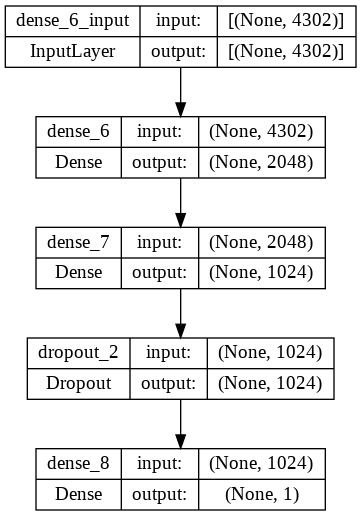

In [87]:
from keras.utils import plot_model

plot_model(model,to_file='model.png',show_shapes=True)

134/134 [==============================] - 0s 2ms/step


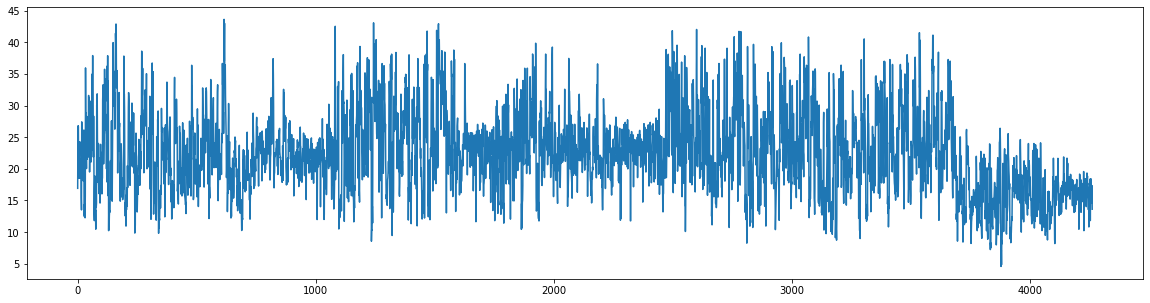

In [88]:
prediction=model.predict(X_test)
#prediction=model.predict(new_test)
plt.figure(figsize=(20,5))
plt.plot(prediction)

In [ ]:
sub['1']=prediction
sub.to_csv('prediction1.csv',index=False)

In [ ]:
sub

In [ ]:
train_data.groupby(by=["year"])
train_data.head(10)

In [ ]:
sns.catplot(
    data=train_data, kind="bar",
    x="year", y="乳量"
)

In [ ]:
train_data.groupby(by=["season"])
train_data.head(10)

In [ ]:
sns.catplot(
    data=train_data, kind="bar",
    x="season", y="乳量"
)

In [ ]:
model2=Sequential()
model2.add(Dense(1024,input_dim=dim,activation='relu'))
model2.add(Dense(2048,activation='relu'))
model2.add(Dense(1024,activation='relu'))
model2.add(Dense(512,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1))
model2.compile(loss=error,optimizer=Adam(lr=1e-3),metrics=[error])
model2.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=10,verbose=1)

In [ ]:
prediction=model2.predict(X_test)
#prediction=model.predict(new_test)
plt.figure(figsize=(20,5))
plt.plot(prediction)